<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [1]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\rohith\anaconda3\lib\site-packages (2.3.1)


You can also check the version of it using the following code.

In [2]:
import tensorflow as tf
tf.__version__

'2.3.1'

Now, it's time to load the dataset

In [3]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [4]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

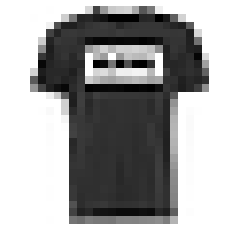

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [6]:
y_train[1]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


Now, it's your turn,

# Procedure
<B>1</B>.I first preprocess the data by normalising it

<B>2</B>.Then I perform PCA to ensure that the number of features remain uniform throughout

<B>3</B>. I create the machine learning models-SVM,Random Forest,K-Nearest Neighbours,Dercision Tree,Logistic Regression

<B>4</B>. I calculate and print various classification and performance parameters such as Accuracy,Precision,Recall and F-1 score along with the Confusion Matrix

<B>5</B>. I compare various parameters and select the best model among the trained set of models

<B>6</B>. I take 5 real world pictures of fashion items , resize them to the correct size,apply PCA and use the model selected in the prevous steps to predict the outcome

In [62]:
#in this cell we declare all the imports needed for the program and analysis

from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import io


<b>PREPROCESSING THE DATA<B>

In [9]:
# in this cell we Normalize the data so that it is standard throughout the program
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [10]:
# in this cell i apply PCA to reduce the features to 200 to keep it uniform
pca=PCA(n_components= 200)
x_train=pca.fit(X_train)
x_train=pca.transform(X_train)
x_test= pca.transform(X_test)


In [11]:
# the below function prints confusion matrix for all the supervised learning models 

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
SVM = SVC(C=1, kernel='linear', gamma="auto") #creating an svc object
SVM.fit(x_train, y_train) #fitting/training the model based on the training data which has been split already



SVC(C=1, gamma='auto', kernel='linear')

*************SVM Report*************
Accuracy score:  0.8499
F1 score:  0.849112596829502
Confusion matrix: 
 [[822   3  11  43   3   1 108   0   9   0]
 [  3 959   4  27   4   0   2   0   1   0]
 [ 20   4 758  10 116   0  86   0   6   0]
 [ 37  15   9 873  25   0  37   0   4   0]
 [  2   2 113  39 754   0  87   0   3   0]
 [  1   0   0   1   0 934   0  46   2  16]
 [156   1 117  38  94   0 572   0  22   0]
 [  0   0   0   0   0  36   0 941   0  23]
 [ 10   1   8   8   1   5  18   5 944   0]
 [  0   0   0   0   0  18   1  39   0 942]]


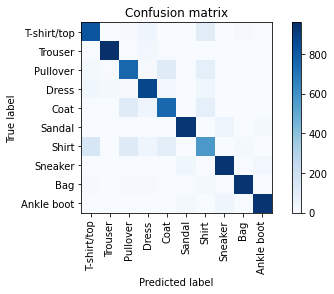

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1000
           1       0.97      0.96      0.97      1000
           2       0.74      0.76      0.75      1000
           3       0.84      0.87      0.86      1000
           4       0.76      0.75      0.76      1000
           5       0.94      0.93      0.94      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.94      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [13]:
# printing various classification scores and reports for the SVM model trained

y_test_hat_svc = SVM.predict(x_test) # predicting the test data
SVM_f1 = metrics.f1_score(y_test, y_test_hat_svc, average= "weighted") # calculating the f1 scores for each class
SVM_accuracy = metrics.accuracy_score(y_test, y_test_hat_svc) # calculating the accuracy scores for each class
SVM_cm = metrics.confusion_matrix(y_test, y_test_hat_svc) # calculating the confusion matrix for the model
print("*************SVM Report*************")
print("Accuracy score: ",SVM_accuracy) # printing the accuracy scores
print("F1 score: ",SVM_f1) # printing the F1 scores
print("Confusion matrix: \n", SVM_cm) # printing the confusion matrix
plt.figure()
plot_confusion_matrix(SVM_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_test_hat_svc))

From the above we see that the Precsion,recall,accuracy and F-1 score for svm is 85. F1 score is taken into consideration while comapring the models as it is a result of both Precision and Recall

<B>RANDOM FOREST MODEL<B>

In [14]:
#in this cell we declare an object for the random forest classifier and we train the object with our preprocessed data
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, max_depth=70)
RF.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=70)

************Random Forest Report****************
Accuracy score:  0.8576
F1 score:  0.8551382009258809
Confusion matrix: 
 [[867   0  15  30   5   4  62   0  17   0]
 [  5 958   7  22   4   0   2   0   2   0]
 [ 14   0 790  12 106   1  69   0   8   0]
 [ 35   4  11 880  33   1  30   0   5   1]
 [  3   0  99  36 798   1  54   0   9   0]
 [  1   0   0   1   0 916   0  42   5  35]
 [191   1 134  29  82   2 533   0  28   0]
 [  0   0   0   0   0  25   0 935   0  40]
 [  4   0   2   8   4  11   5   6 958   2]
 [  0   0   0   0   0  19   0  39   1 941]]


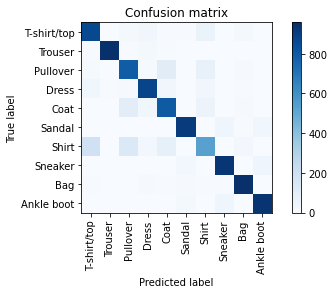

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.79      0.77      1000
           3       0.86      0.88      0.87      1000
           4       0.77      0.80      0.79      1000
           5       0.93      0.92      0.93      1000
           6       0.71      0.53      0.61      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.96      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [15]:
# in this cell we test the trained model by making it predict the test data provided to us,
# we also plot the various classification scores and conusion matrix for the random forest model
y_test_hat_RF = RF.predict(x_test)
RF_f1 = metrics.f1_score(y_test, y_test_hat_RF, average= "weighted")
RF_accuracy = metrics.accuracy_score(y_test, y_test_hat_RF)
RF_cm = metrics.confusion_matrix(y_test, y_test_hat_RF)
print("************Random Forest Report****************")
print("Accuracy score: " ,RF_accuracy)
print("F1 score: ",RF_f1)
print("Confusion matrix: \n", RF_cm)
plt.figure()
plot_confusion_matrix(RF_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_test_hat_RF))


From the above we see that the Precsion,recall,accuracy and F-1 score for Random Forest is 86. F-1 score is taken into consideration while comapring the models as it is a result of both Precision and Recall

<B>Decision Tree<B>

In [16]:
#in this cell we declare an object for the Decision Tree classifier and we train the object with our preprocessed data

DT = DecisionTreeClassifier(criterion='entropy',max_depth=100)
DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

****************Decision Tree Report****************
Accuracy score:  0.7757
F1 score:  0.7761237454782152
Confusion matrix: 
 [[729   9  32  48  17   3 152   0  10   0]
 [  8 949   5  26   5   0   4   0   3   0]
 [ 26   4 620  22 158   0 155   0  14   1]
 [ 50  38  28 772  46   1  58   0   7   0]
 [  6   4 166  43 639   0 128   0  13   1]
 [  0   1   0   0   0 857   3  81  12  46]
 [152   8 134  40 127   1 511   0  26   1]
 [  0   0   0   0   0  52   0 882   6  60]
 [ 13   2  16   4  14  10  24  10 904   3]
 [  1   0   0   0   1  40   1  59   4 894]]


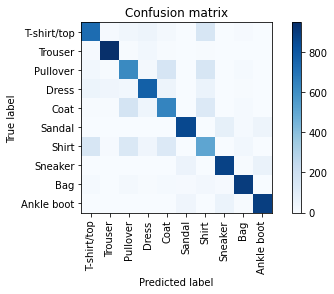

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.93      0.95      0.94      1000
           2       0.62      0.62      0.62      1000
           3       0.81      0.77      0.79      1000
           4       0.63      0.64      0.64      1000
           5       0.89      0.86      0.87      1000
           6       0.49      0.51      0.50      1000
           7       0.85      0.88      0.87      1000
           8       0.90      0.90      0.90      1000
           9       0.89      0.89      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



In [17]:
# in this cell we test the trained model by making it predict the test data provided to us,
# we also plot the various classification scores and conusion matrix for the Decision Tree Model

y_test_hat_DT = DT.predict(x_test)
DT_f1 = metrics.f1_score(y_test, y_test_hat_DT, average= "weighted")
DT_accuracy = metrics.accuracy_score(y_test, y_test_hat_DT)
DT_cm = metrics.confusion_matrix(y_test, y_test_hat_DT)
print("****************Decision Tree Report****************")
print("Accuracy score: ",DT_accuracy)
print("F1 score: ",DT_f1)
print("Confusion matrix: \n", DT_cm)
plt.figure()
plot_confusion_matrix(DT_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_test_hat_DT))


From the above we see that the Precsion,recall,accuracy and F-1 score for Decsision Tree is 78. F1 score is taken into consideration while comapring the models as it is a result of both Precision and Recall

<b>KNN<b>

In [18]:
#in this cell we declare an object for the KNN and we train the object with our preprocessed data

KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

****************KNN****************
Accuracy score:  0.8624
F1 score:  0.8612469172206527
Confusion matrix: 
 [[869   0  18  19   5   1  80   1   7   0]
 [ 10 968   3  12   4   0   2   0   1   0]
 [ 22   2 813  11  84   0  68   0   0   0]
 [ 37   8  17 871  29   0  35   0   3   0]
 [  2   1 127  26 768   0  72   0   4   0]
 [  1   0   0   0   0 886   0  62   1  50]
 [193   0 122  23  85   0 564   0  13   0]
 [  0   0   0   0   0   8   0 968   0  24]
 [  2   0   9   5   6   1  10   6 959   2]
 [  0   0   0   0   0   1   0  40   1 958]]


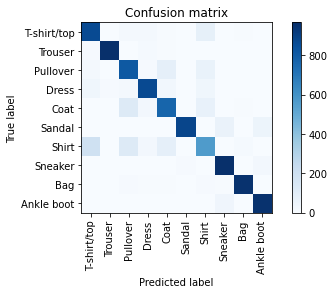

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.81      0.77      1000
           3       0.90      0.87      0.89      1000
           4       0.78      0.77      0.78      1000
           5       0.99      0.89      0.93      1000
           6       0.68      0.56      0.62      1000
           7       0.90      0.97      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [19]:
# in this cell we test the trained model by making it predict the test data provided to us,
# we also plot the various classification scores and conusion matrix for the KNN model

y_test_hat_KNN = KNN.predict(x_test)
KNN_f1 = metrics.f1_score(y_test, y_test_hat_KNN, average= "weighted")
KNN_accuracy = metrics.accuracy_score(y_test, y_test_hat_KNN)
KNN_cm = metrics.confusion_matrix(y_test, y_test_hat_KNN)
print("****************KNN****************")
print("Accuracy score: ",KNN_accuracy)
print("F1 score: ",KNN_f1)
print("Confusion matrix: \n", KNN_cm)
plt.figure()
plot_confusion_matrix(KNN_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_test_hat_KNN))

From the above we see that the Precsion,recall,accuracy and F-1 score for KNN is 85. F1 score is taken into consideration while comapring the models as it is a result of both Precision and Recall


<B>Logistic Regression<B>

In [20]:

LR = LogisticRegression(multi_class='auto',solver='sag',max_iter=100)
LR.fit(x_train,y_train)


C:\Users\Rohith\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(solver='sag')

****************Logistic Regression****************
Accuracy score:  0.8443
F1 score:  0.8433534876573591
Confusion matrix: 
 [[812   2  15  49   6   0 105   0  11   0]
 [  3 955   5  26   5   0   5   0   1   0]
 [ 18   3 741  11 126   1  89   1  10   0]
 [ 32  12  11 875  25   0  38   0   7   0]
 [  0   2 114  34 757   0  87   0   6   0]
 [  0   0   0   1   0 925   0  54   3  17]
 [140   2 125  39 106   0 558   0  30   0]
 [  0   0   0   0   0  34   0 938   0  28]
 [  6   1   4  11   5   5  20   6 942   0]
 [  0   1   0   0   0  16   0  42   1 940]]


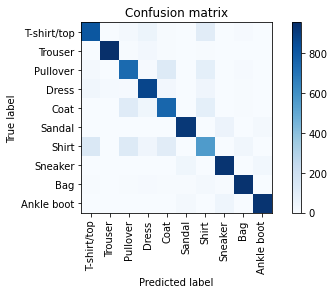

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.74      1000
           3       0.84      0.88      0.86      1000
           4       0.73      0.76      0.75      1000
           5       0.94      0.93      0.93      1000
           6       0.62      0.56      0.59      1000
           7       0.90      0.94      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [21]:
# in this cell we test the trained model by making it predict the test data provided to us,
# we also plot the various classification scores and conusion matrix for the Logistic Regressison model

y_test_hat_LR = LR.predict(x_test)
LR_f1 = metrics.f1_score(y_test, y_test_hat_LR, average= "weighted")
LR_accuracy = metrics.accuracy_score(y_test, y_test_hat_LR)

LR_cm = metrics.confusion_matrix(y_test, y_test_hat_LR)
print("****************Logistic Regression****************")
print("Accuracy score: ",LR_accuracy)
print("F1 score: ",LR_f1)

print("Confusion matrix: \n", LR_cm)
plt.figure()
plot_confusion_matrix(LR_cm, class_names)
plt.show()
print(metrics.classification_report(y_test, y_test_hat_LR))



From the above we see that the Precsion,recall,accuracy and F-1 score for Logistic Regression is 84. F1 score is taken into consideration while comapring the models as it is a result of both Precision and Recall

# COMPARISION

In [22]:
# in this cell we declare a list and enter all the f1,accuracy,recall,precision scores and declare the models in another list
f1_list=[84,86,77,85,84]
accuracy_list=[84,86,77,85,84]
Recall_list=[84,86,77,85,85]
Precision_list=[84,86,77,85,84]
Models=['SVM','Random Forest','Decision Tree','KNN','Logistic Regression']

Text(0.5, 1.0, 'Precision')

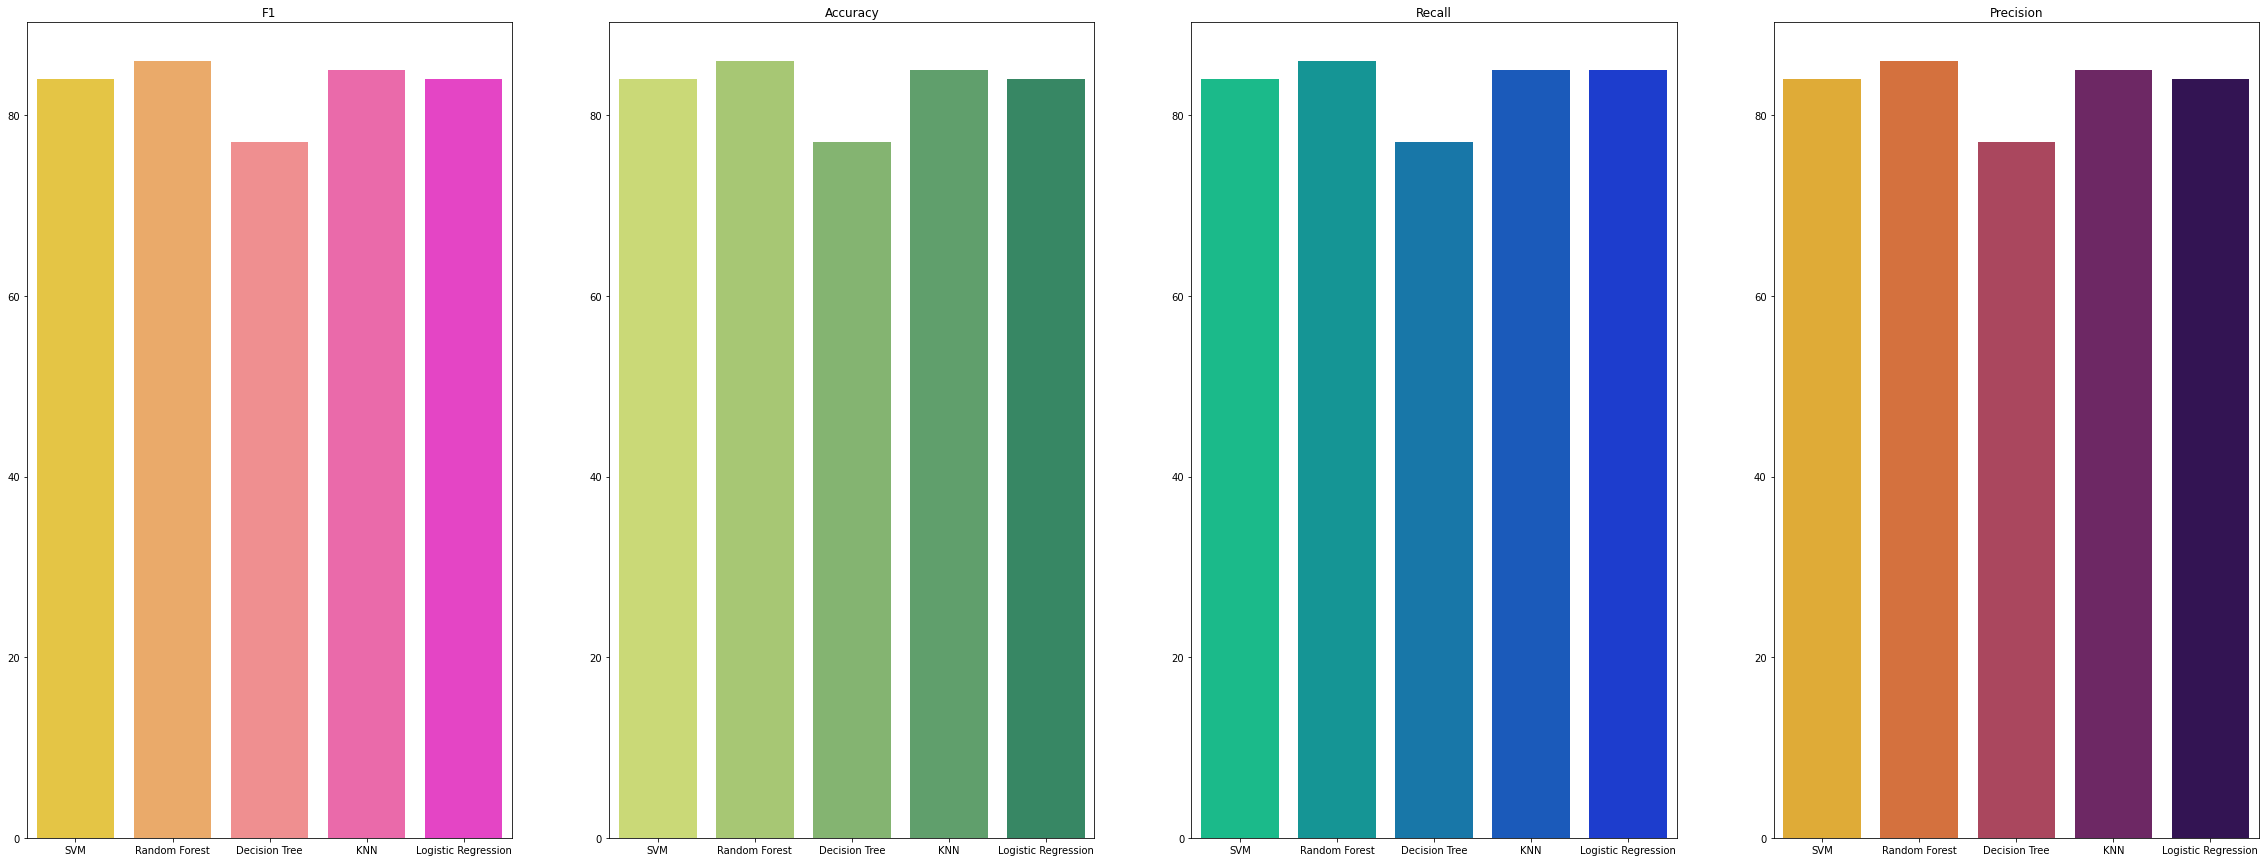

In [23]:
# we plot the various scores from previous cell in a bar chart for comparison
f, axes = plt.subplots(1, 4,figsize=(40,15))
sns.barplot(x=Models,y=f1_list, ax=axes[0],palette='spring_r').set_title("F1")
sns.barplot(x=Models,y=accuracy_list, ax=axes[1],palette='summer_r').set_title("Accuracy")
sns.barplot(x=Models,y=Recall_list, ax=axes[2],palette='winter_r').set_title("Recall")
sns.barplot(x=Models,y=Precision_list, ax=axes[3],palette='inferno_r').set_title("Precision")


<B>Random Forest outperforms other models because of a higher F-1 score. We take into account the F-1 score because it is obtained using both precision and recall scores. </B>

# PART-2

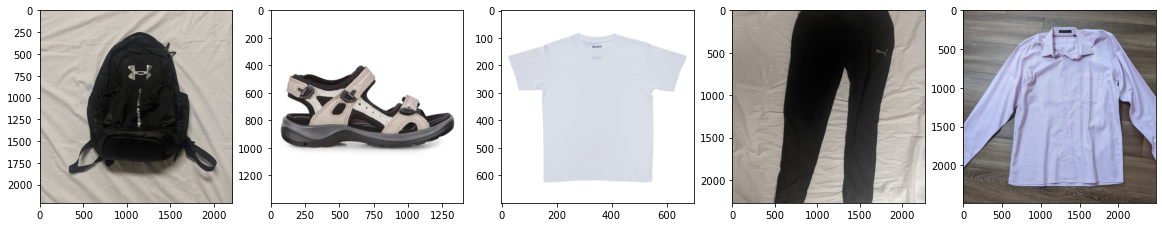

In [63]:
# in this cell i load my own images and visualize them.

img1 = mplib.imread('Bag.jpg')
img2 = mplib.imread('Sandal.jpg')
img3 = mplib.imread('Tshirt.jpg')
img4 = mplib.imread('Trouser.jpg')
img5 = mplib.imread('Shirt.jpg')

images_list=[]

images_list.append(img1)
images_list.append(img2)
images_list.append(img3)
images_list.append(img4)
images_list.append(img5)


f, axarr = plt.subplots(1,5,figsize=(20,20))
axarr[0].imshow(images_list[0])
axarr[1].imshow(images_list[1])
axarr[2].imshow(images_list[2])
axarr[3].imshow(images_list[3])    
axarr[4].imshow(images_list[4]) 


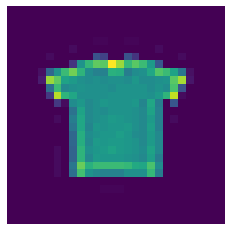

The actual class name is: T-shirt/top 
The predicted class name is: T-shirt/top


In [25]:
# The following code has been adapted and modified to our requirements from stack overflow. Used stackoverflow as reference.
#The following cell takes an image and converts it to greyscale and 28*28 size. Thus making it suitable for MNIST prediction
# we vizualize and predict the converted image using our random forest model
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels
    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1            
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:       
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1            
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas
    tv = list(newImage.getdata())  # get pixel values    
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=[imageprepare('./Tshirt.jpg')]#file path here
newArr=[[0 for d in range(28)] for y in range(28)] 
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1
plt.imshow(newArr, interpolation='nearest')
plt.savefig('MNIST_Tshirt.png')#save MNIST image
plt.axis('off')
plt.show()#Show / plot that image

#predicting the class name of the image processed by us after applying PCA
x_test_Tshirt=pca.transform(x)
y_test_hat_RF1 = RF.predict(x_test_Tshirt)
print("The actual class name is: T-shirt/top \nThe predicted class name is:",class_names[y_test_hat_RF1[0]])


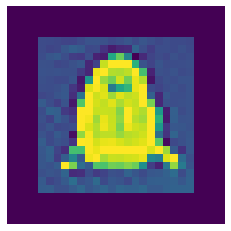

The actual class name is: Bag 
The predicted class name is: Bag


In [26]:
# The following code has been adapted and modified to our requirements from stack overflow. Used stackoverflow as reference.
#The following cell takes an image and converts it to greyscale and 28*28 size. Thus making it suitable for MNIST prediction
# we vizualize and predict the converted image using our random forest model
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels
    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1            
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:       
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1            
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas
    tv = list(newImage.getdata())  # get pixel values    
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=[imageprepare('./Bag.jpg')]#file path here
newArr=[[0 for d in range(28)] for y in range(28)] 
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1
plt.imshow(newArr, interpolation='nearest')
plt.savefig('Bag1.png')#save MNIST image
plt.axis('off')
plt.show()#Show / plot that image

#predicting the class name of the image processed by us after applying PCA
x_test_Bag=pca.transform(x)
y_test_hat_RF1 = RF.predict(x_test_Bag)
print("The actual class name is: Bag \nThe predicted class name is:",class_names[y_test_hat_RF1[0]])


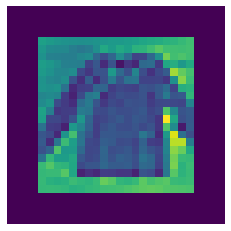

The actual class name is: Shirt 
The predicted class name is: Pullover


In [27]:
# The following code has been adapted and modified to our requirements from stack overflow. Used stackoverflow as reference.
#The following cell takes an image and converts it to greyscale and 28*28 size. Thus making it suitable for MNIST prediction
# we vizualize and predict the converted image using our random forest model
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels
    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1            
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:       
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1            
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas
    tv = list(newImage.getdata())  # get pixel values    
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=[imageprepare('./Shirt.jpg')]#file path here
newArr=[[0 for d in range(28)] for y in range(28)] 
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1
plt.imshow(newArr, interpolation='nearest')
plt.savefig('MNIST_Bag.png')#save MNIST image
plt.axis('off')
plt.show()#Show / plot that image

#predicting the class name of the image processed by us after applying pca
x_test_shirt=pca.transform(x)
y_test_hat_RF1 = RF.predict(x_test_shirt)
print("The actual class name is: Shirt \nThe predicted class name is:",class_names[y_test_hat_RF1[0]])


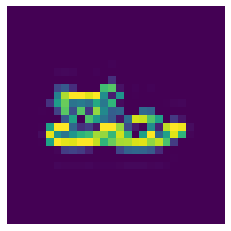

The actual class name is: Sandal 
The predicted class name is: Sandal


In [28]:
# The following code has been adapted and modified to our requirements from stack overflow. Used stackoverflow as reference.
#The following cell takes an image and converts it to greyscale and 28*28 size. Thus making it suitable for MNIST prediction
# we vizualize and predict the converted image using our random forest model
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels
    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1            
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:       
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1            
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas
    tv = list(newImage.getdata())  # get pixel values    
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=[imageprepare('./Sandal.jpg')]#file path here
newArr=[[0 for d in range(28)] for y in range(28)] 
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1
plt.imshow(newArr, interpolation='nearest')
plt.savefig('MNIST_Sandal.png')#save MNIST image
plt.axis('off')
plt.show()#Show / plot that image

#predicting the class name of the image processed by us after applying PCA
x_test_sandal=pca.transform(x)
y_test_hat_RF1 = RF.predict(x_test_sandal)
print("The actual class name is: Sandal \nThe predicted class name is:",class_names[y_test_hat_RF1[0]])


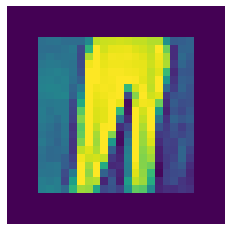

The actual class name is: Trouser 
The predicted class name is: Bag


In [555]:
# The following code has been adapted and modified to our requirements from stack overflow. Used stackoverflow as reference.
#The following cell takes an image and converts it to greyscale and 28*28 size. Thus making it suitable for MNIST prediction
# we vizualize and predict the converted image using our random forest model
def imageprepare(argv):
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels
    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1            
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:       
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1            
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas
    tv = list(newImage.getdata())  # get pixel values    
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

x=[imageprepare('./Trouser.jpg')]#file path here
newArr=[[0 for d in range(28)] for y in range(28)] 
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1
plt.imshow(newArr, interpolation='nearest')
plt.savefig('MNIST_Trouser.png')#save MNIST image
plt.axis('off')
plt.show()#Show / plot that image

#predicting the class name of the image processed by us after applying PCA
x_test_trouser=pca.transform(x)
y_test_hat_RF1 = RF.predict(x_test_trouser)
print("The actual class name is: Trouser \nThe predicted class name is:",class_names[y_test_hat_RF1[0]])


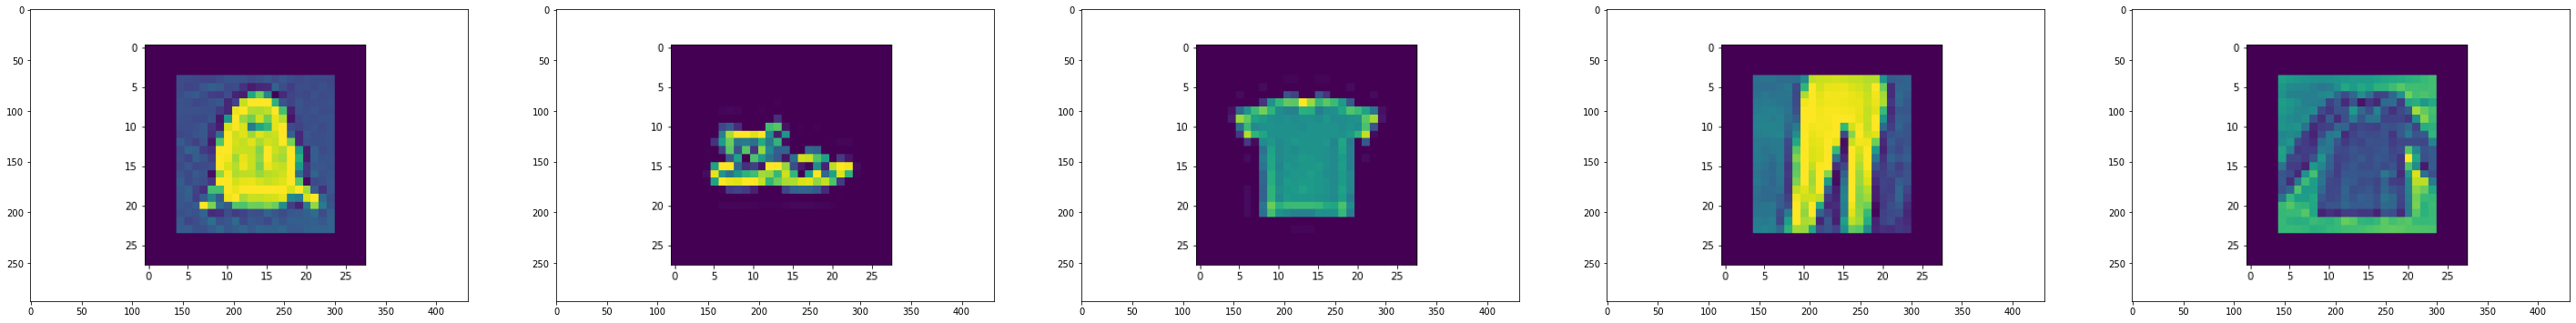

In [556]:
# in this cell we visualize the reshaped images that have been used for prediction side by side
img6 = mplib.imread('Bag1.png')
img7 = mplib.imread('MNIST_Sandal.png')
img8 = mplib.imread('MNIST_Tshirt.png')
img9 = mplib.imread('MNIST_Trouser.png')
img10 = mplib.imread('MNIST_Shirt.png')

images_list=[]

images_list.append(img6)
images_list.append(img7)
images_list.append(img8)
images_list.append(img9)
images_list.append(img10)


f, ax = plt.subplots(1,5,figsize=(50,50))
ax[0].imshow(images_list[0])
ax[1].imshow(images_list[1])
ax[2].imshow(images_list[2])
ax[3].imshow(images_list[3])    
ax[4].imshow(images_list[4]) 

# Challenges

<B>1.</B> In the first attempt i executed the code without applying PCA and the result was : <B> ValueError: Number of features of the model must match the input. Model n_features is 200 and input n_features is 784</B>
, After Applying PCA it was evident that the numnber of features of the training set which is used to train the model and the data set we use for predicting match in terms of features

<B>2.</B> The images which have a white background are predicted fairly correctly as compared to the images which have a different coloured background 

<B>3.</B> The images which are already in square shape are resized easily and correctly when compared to the images in other shapes

# Results


<table style="width:100%">
  <tr>
    <th>Input</th>
    <th>Predictged</th> 
    <th>Result</th>
  </tr>
  <tr>
    <td>Bag</td>
    <td>Bag</td>
      <td>Correct</td>
  </tr>
  <tr>
    <td>Trouser</td>
    <td>Bag</td>
    <td>Incorrect</td>
  </tr>
  <tr>
    <td>Sandal</td>
    <td>Sandal</td>
    <td>Correct</td>
  </tr>
  <tr>
    <td>Shirt</td>
    <td>Bag</td>
    <td>Incorrect</td>
  </tr>
  <tr>
    <td>T-shirt/Top</td>
    <td>T-shirt/Top</td>
    <td>Correct</td>
  </tr>
</table>
   
<B>From the above we see that we get an overall result of (3/5) 60%  for the images which are not apart of the fashion MNIST dataset</B>

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>